In [1]:
## Catálogo das Abordagens
#  A1: Cadastro
#  A2: Medidas
#      A2.1: Medidas Importantes
#      A2.2: Select KBeast
#  A3: Estatística
#  A4: Doenças
#      A4.1: Select KBest
#  A5: Doenças sem Hipotensão e Normotenso
#  A6: Escolho Doença
#  A7: Categorias
#  A8: Extratificação Sexo Masculino
#  A9: Extratificação Sexo Feminino
#  A10: Sistólicas
#  A11: Diastólicas
#  A12: Medidas Mais Importantes

In [2]:
#bibliotecas pandas de leitura de arquivos
import pandas as pd
#biblioteca do kmeans
from sklearn.cluster import KMeans
import numpy as np
#avaliar classificacao cluster
#from sklearn.metrics.cluster import adjusted_rand_score
#visualizar graficos
import matplotlib.pyplot as plt
#caracter 
import re
#countar os itens de uma lista
from collections import Counter
#separar treino, teste, validação
from sklearn.model_selection import train_test_split
# métricas de avaliação do K-Means
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
# Método Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math
from sklearn import svm

from sklearn_extra.cluster import KMedoids

from IPython.display import Image
from pathlib import Path


#from sklearn_extra.cluster import KMedoids

In [3]:
#!pip install scikit-learn-extra --user

In [4]:
# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIR_BASE = DIR_PREFIXO / "Projeto_PA" / "dataset_modificado"
DIR_KMEDOIDS = DIRETORIO_PRINCIPAL / "KMedoids"


In [5]:
#leitura do dataset completo com dados cadastrais, medidas e estatísticas

dataset = pd.read_csv(DIR_BASE / "pacientes_completos_tratados.csv",sep=';', encoding="Latin1")
dataset_apos_tratamento = dataset


#dataset = dataset.drop ("Unnamed: 0", axis=1)
#for i in dataset.columns:
#    print(repr(i))
#

In [6]:
#  Utilizando a métrica Manhattan

#!pip install scikit-learn-extra

In [7]:
#dataset_por_classes[ls_classes2]

In [8]:
#np.array(dataset_por_classes[ls_classes2]).shape

In [9]:
############################### FUNÇÕES ##########################################

#Funções para calcular o melhor numero de cluster(grupos) que seu dataset gerar

def calculate_wcss(data):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    from sklearn_extra.cluster import KMedoids
    wcss = []
    for n in range(2, 21):
        #kmedoids = KMedoids(n_clusters=2, random_state=0,metric='manhattan')
        kmedoids = KMedoids(n_clusters=n, random_state=42, metric='manhattan')
        kmedoids.fit(X=data)
        wcss.append(kmedoids.inertia_)

    return wcss



def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [10]:
#converter peso em float

#def Tratar_Peso(peso):    
#    
#    try:
#        if peso[-1] == ',' or peso[-1] == '.':
#            peso =  peso[:-1]
#    except:
#        pass
#    
#    
#    try:
#        peso = float(peso)
#    except:
#        peso = float(peso.replace(',','.'))
#    return peso
#
##converter altura
#def Tratar_Altura(altura):       
#       
#    altura = str(altura)
#    if re.match('\d,,\d', altura):
#        altura = altura.replace(',,','')
#    
#    try:
#        if altura[-1] == ',' or altura[-1] == '.' or  altura[-1] == ']':
#            altura =  altura[:-1]
#    except:
#        pass
#    
#    try:
#        altura = float(altura)
#    except:
#        altura = float(altura.replace(',','.'))     
#    
#    # convt 150.00 para 1.50
#    if altura >= 3:
#        altura = altura/100 
#    
#    
#    return altura
#
##calcular o IMC
#def IMC(peso,altura):  
#        
#    imc = float(peso) / (float(altura) ** 2)
#    
#    return np.round (imc, 1)
#
#
##Trocar  True para 1 e False para 0
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0
#
#def normaliza_float(n):
#    if isinstance(n, (float, int)):
#        return n
#    if isinstance(n, str):
#        if "," in n:
#            n = n.replace(",", ".")
#        if not n.replace(".", "").isdigit():
#            n = "".join(digito for digito in n if digito in "0123456789.")
#        n = n.replace("..", ".")
#        if not n or n.count(".") > 1:
#            n = float("nan")
#         # convt 150.00 para 1.50
#        n = float(n)
#        if n >= 3:
#            while 1:
#                if (n//10 == 0.0 or n//10 == 0):
#                    break
#                else:
#                    n = n/10 
#    return float(n)

In [11]:
dataset_apos_tratamento['IMC']

0        33.2
1        29.4
2        25.8
3        24.2
4        40.6
         ... 
19149    27.5
19150    26.9
19151    33.3
19152    25.0
19153    30.9
Name: IMC, Length: 19154, dtype: float64

In [12]:
# transform Gender M and F to binary 

#limpa_coluna_genero = {"genero": {"M": True, "F": False}}
#controle = 1
#genero0 = dataset['genero']
#for i in range(len(genero0)):
#    if genero0.iloc[i] != 'M' and genero0.iloc[i] != 'F':
#        if controle == 1:
#            genero0.iloc[i] = 0
#            controle = 0
#        else:
#            genero0.iloc[i] = 1
#            controle = 1
#
#dataset_apos_tratamento['genero'] = genero0
#
#dataset_apos_tratamento = dataset_apos_tratamento.replace(limpa_coluna_genero)
#
#dataset_apos_tratamento["genero"] = dataset_apos_tratamento["genero"].astype(int)
##
##
#
genero_M_F = {"genero": {1: "M", 0: "F"}}

##  Tratar os dados para colocá-los em Categorias

In [13]:
# Cálculo do Indice de Massa Corporal:
#         IMC entre 18,0 e 24,9 Kg/m2: normal
#         IMC menor do que 18,0 Kg/m2: baixo peso
#         IMC entre 25,0 e 29,9 Kg/m2: sobrepeso 
#         IMC entre 30,0 e 34,9 Kg/m2: obesidade grau I 
#         IMC entre 35,0 e 39,9 Kg/m2: obesidade grau II 
#         IMC maior do que 40,0 Kg/m2: obesidade grau III  

def faixas_imc(imc):
    classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    
#    classes = ["Baixo Peso","Normal","Sobrepeso",
#               "Obesidade grau I","Obesidade grau II","Obesidade Grau III"]
#    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
        
def faixas_imc_classe(imc):
    classes = [1, 2, 3]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    
#    classes = [1, 2, 3, 4, 5, 6]
#    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_etarias(idade):
    classes = ["Adultos","Meia-idade","Idoso"]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    
#    classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
#    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias_classe(idade):
    classes = [1, 2, 3]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    
#    classes = [1, 2, 3, 4, 5, 6]
#    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

In [14]:
#dataset_apos_tratamento['idade'] = dataset_apos_tratamento['idade'].fillna(-1)
#dataset_apos_tratamento = dataset_apos_tratamento[dataset_apos_tratamento['idade'] != -1]

In [15]:
#dataset_apos_tratamento = dataset_apos_tratamento[dataset_apos_tratamento['altura_normalizada'] <= 2.5]
#dataset_apos_tratamento = pd.concat([dataset_apos_tratamento.loc[:,'numero_identificacao':'altura'],
#                                     dataset_apos_tratamento['IMC'],
#                                    dataset_apos_tratamento.loc[:,'data_exame':'Picos Diastolica']],
#                                    axis=1)
#
#print(len(dataset_apos_tratamento))
## Dataset com IMC e tratamento de Nans com a política de normalização
#dataset_apos_tratamento.to_csv(DIR_BASE / "pacientes_completos_tratados.csv", 
#                        sep=";", encoding="latin1", index=False)
#
#dataset_apos_tratamento.to_csv(DIR_BASE / "pacientes_com_tab.csv", 
#                        sep="\t", encoding="latin1", index=False)

In [16]:
dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat']

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat
0,True,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,True,False,False,False
2,True,False,False,False,True,False,False,False,False,True
3,True,False,False,True,False,False,False,False,False,True
4,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19149,True,False,False,True,False,False,False,True,False,True
19150,True,False,False,False,True,False,False,False,False,True
19151,True,False,False,False,True,False,False,False,False,True
19152,True,False,False,False,False,True,False,False,False,False


In [17]:
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0

In [18]:
dataset_por_classes = pd.DataFrame()
dataset_por_classes['numero_identificacao'] = dataset_apos_tratamento['numero_identificacao']
dataset_por_classes['genero'] = dataset_apos_tratamento['genero']
dataset_por_classes['idade'] = dataset_apos_tratamento['idade'].apply(faixas_etarias_classe)
dataset_por_classes['IMC'] = dataset_apos_tratamento['IMC'].apply(faixas_imc_classe)
dataset_por_classes = pd.concat([dataset_por_classes, dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)
for doenca in list(dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat'].columns):
    dataset_por_classes[doenca] = dataset_apos_tratamento[doenca].apply(verdadeiro_falso)
dataset_por_classes

,numero_identificacao,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat
0,4,1,3,3,105.0,108.0,116.0,104.0,106.0,98.0,...,1,0,0,0,0,0,1,0,0,0
1,5,1,3,2,103.0,114.0,82.0,104.0,98.0,106.0,...,1,0,0,0,0,0,1,0,0,0
2,6,1,1,2,147.0,148.0,156.0,140.0,130.0,132.0,...,1,0,0,0,1,0,0,0,0,1
3,7,0,1,1,140.0,139.0,142.0,137.0,135.0,177.0,...,1,0,0,1,0,0,0,0,0,1
4,8,1,1,3,113.0,110.0,101.0,108.0,111.0,111.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1,1,2,163.0,198.0,172.0,148.0,161.0,156.0,...,1,0,0,1,0,0,0,1,0,1
19150,21787,1,1,2,114.0,120.0,164.0,116.0,119.0,126.0,...,1,0,0,0,1,0,0,0,0,1
19151,21788,0,1,3,107.0,110.0,103.0,105.0,108.0,111.0,...,1,0,0,0,1,0,0,0,0,1
19152,21792,0,3,2,94.0,107.0,112.0,124.0,120.0,94.0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
dataset_apos_tratamento['IMC'].unique

<bound method Series.unique of 0        33.2
1        29.4
2        25.8
3        24.2
4        40.6
         ... 
19149    27.5
19150    26.9
19151    33.3
19152    25.0
19153    30.9
Name: IMC, Length: 19154, dtype: float64>

In [20]:
dataset_apos_tratamento

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,105.0,108.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34,0.966110
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,103.0,114.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23,0.969464
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,147.0,148.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,140.0,139.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,113.0,110.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,163.0,198.0,...,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60,1.134475
19150,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,114.0,120.0,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27,1.045759
19151,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,107.0,110.0,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26,1.029243
19152,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,94.0,107.0,...,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13,1.251898


In [21]:
# Dataset com cadastro, IMC e medidas
dataset_cadastro = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                             dataset_apos_tratamento['genero'],dataset_apos_tratamento['idade'],
                             dataset_apos_tratamento['IMC'],
                     dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset com as medidas
dataset_medidas = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset com numero identificação e estatísticas
dataset_estatistica = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'Media Sistolica em 24h':'DP Diastolica em 24h']],axis=1)

# Dataset com numero identificação e doenças
dataset_doenca = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'Hipotensao':'Normotenso']],axis=1)

dataset_masc = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 1]

dataset_masc_medidas =  pd.concat([dataset_masc['numero_identificacao'],
                     dataset_masc.loc[:,'sist 9:00':'diast 8:45']],axis=1)


dataset_fem = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 0]

dataset_fem_medidas =  pd.concat([dataset_fem['numero_identificacao'],
                     dataset_fem.loc[:,'sist 9:00':'diast 8:45']],axis=1)

In [22]:
print(f'Quantidade F: {len(dataset_fem_medidas)}\nQuantidade M: {len(dataset_masc_medidas)}')

Quantidade F: 10447
Quantidade M: 8707


# Abordagem 1: Cadastro e Medidas como entrada

In [23]:
dataset_cadastro

,numero_identificacao,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,5,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,6,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,7,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,8,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19150,21787,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19151,21788,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19152,21792,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [24]:
#selecionando variaveis de medidad : sist 9:00 a diast 8:45
#campos sist e diast

#   Gera uma lista com cabeçalhos
ls_cadastro = list(dataset_cadastro.loc[:,'genero':'diast 8:45'].columns)

dados_cadastro_sem_id = dataset_cadastro.loc[:,'genero':'diast 8:45']
#dados_sist_diast = dados_sist_diast.drop(['peso','altura','data_exame'],axis=1)

dados_cadastro_sem_id.head(5)

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0


# Abordagem 1: Número de Clusters gerado pelo k-Medoids

In [25]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
%time sum_of_squares_cadastro = calculate_wcss(dados_cadastro_sem_id)
num_otimo_clusters_cadastro = optimal_number_of_clusters(sum_of_squares_cadastro)
num_otimo_clusters_cadastro

Wall time: 19min 6s


7

In [26]:
dados_cadastro_sem_id

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,156.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19150,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,123.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19151,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,114.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19152,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,102.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [27]:
#convertendo os dados para a clusterização
#  Dados socio-demográficos, os grupos e as 164 medidas de PAS e PAD
dados_cadastro_array = np.array(dados_cadastro_sem_id)

In [28]:
#habilitando o kmeans com 8 grupos (foi calculado na etapa anterior)
kmedoids_cadastro =  KMedoids(n_clusters=num_otimo_clusters_cadastro, random_state=42, metric='manhattan').fit(dados_cadastro_array)

In [29]:
#listar os grupos 
grupos_cadastro = kmedoids_cadastro.fit_predict(dados_cadastro_array)

In [30]:
#incluir grupos nos dados de sist e diast
dados_cadastro_sem_id['grupo'] = grupos_cadastro
dados_cadastro_sem_id['grupo'] = dados_cadastro_sem_id['grupo'] + 1
dados_cadastro_sem_id


,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0,5
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0,5
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0,7
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0,7
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,156.0,...,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0,6
19150,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,123.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,6
19151,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,114.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,5
19152,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,102.0,...,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,5


## Abordagem 1: O método Elbow

### Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico

### https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

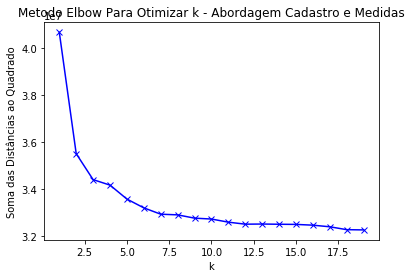

Wall time: 82.9 ms


In [31]:
#metodo de Elbow
Sum_of_squared_distances = []
K = range(1,20)

for k in K:
    km = KMedoids(n_clusters=k, metric='manhattan')
    km = km.fit(dados_cadastro_array)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das Distâncias ao Quadrado')
plt.title('Metodo Elbow Para Otimizar k - Abordagem Cadastro e Medidas')
fig = plt.gcf() 
fig.savefig( DIR_KMEDOIDS / 'graficos' / f'metodoelbow_cadastro.svg', format="svg")
%time plt.show()

In [32]:
#fig.savefig('D:\Projeto_PA\\Projeto_PA_validado\\KMeansRandom\\graficos\\grafico_metodoelbow_medidas.svg', format='svg')
#plt.savefig(DIR_NMF / f'NMF_classificado_{grupo}.svg',format="svg")
#fig.savefig('diastolica_sistolica/diast_sist_elbow.png', format='png')


## Abordagem 1: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



Wall time: 1min 4s
Para n_clusters = 2 O score_silhouette medio e : 0.21251160528975474
Wall time: 1min 2s
Para n_clusters = 3 O score_silhouette medio e : 0.09262905303423709
Wall time: 59.6 s
Para n_clusters = 4 O score_silhouette medio e : 0.06082352941647328
Wall time: 1min
Para n_clusters = 5 O score_silhouette medio e : 0.041041172876470834
Wall time: 58.6 s
Para n_clusters = 6 O score_silhouette medio e : 0.024102468975032106
Wall time: 1min
Para n_clusters = 7 O score_silhouette medio e : 0.02671772902859291
Wall time: 59.3 s
Para n_clusters = 8 O score_silhouette medio e : 0.02555143659096282


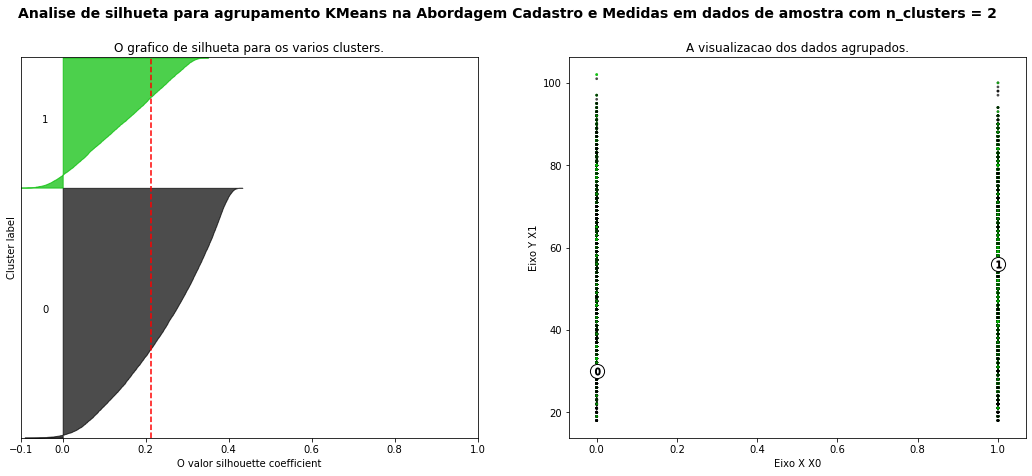

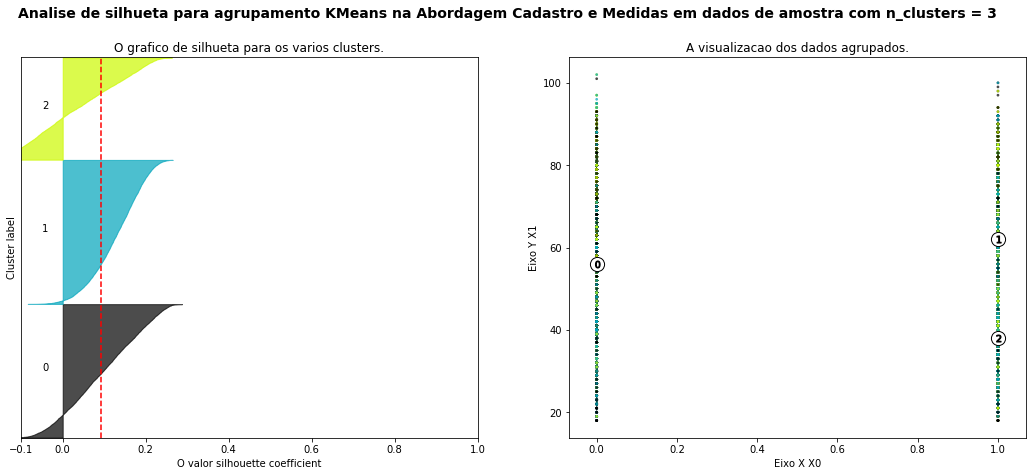

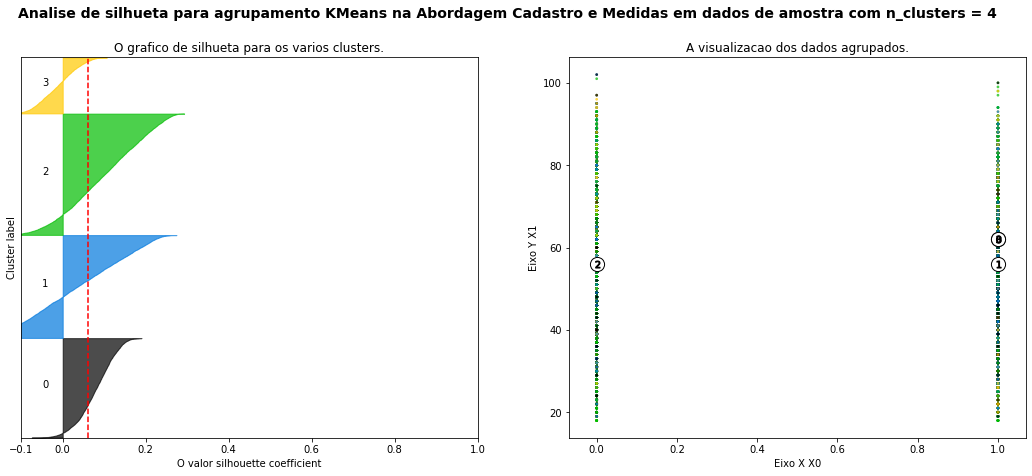

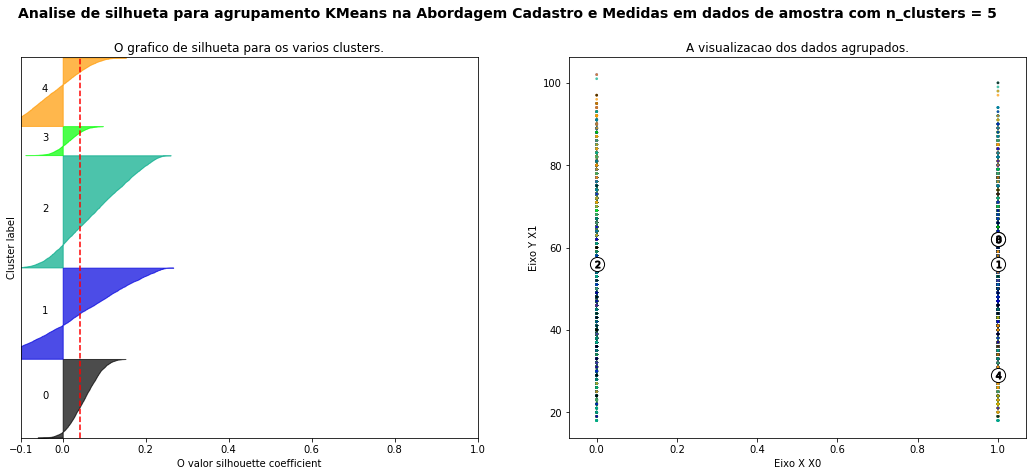

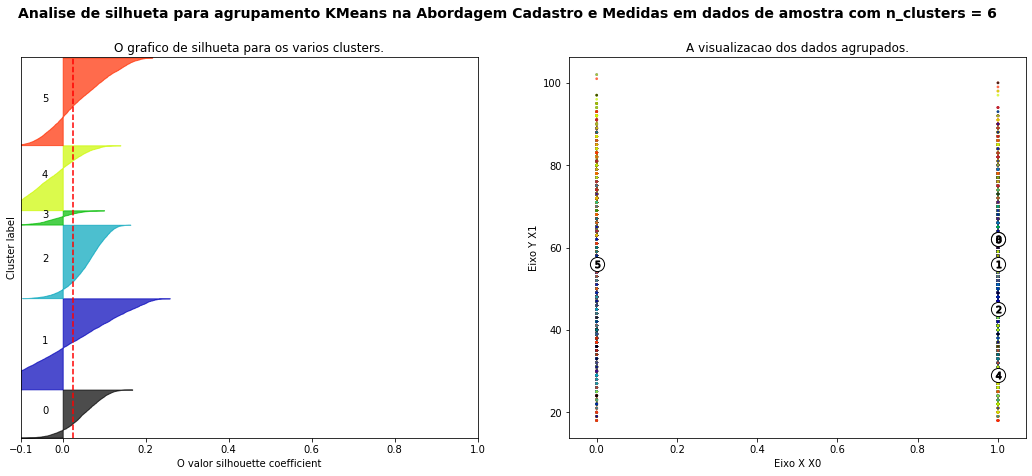

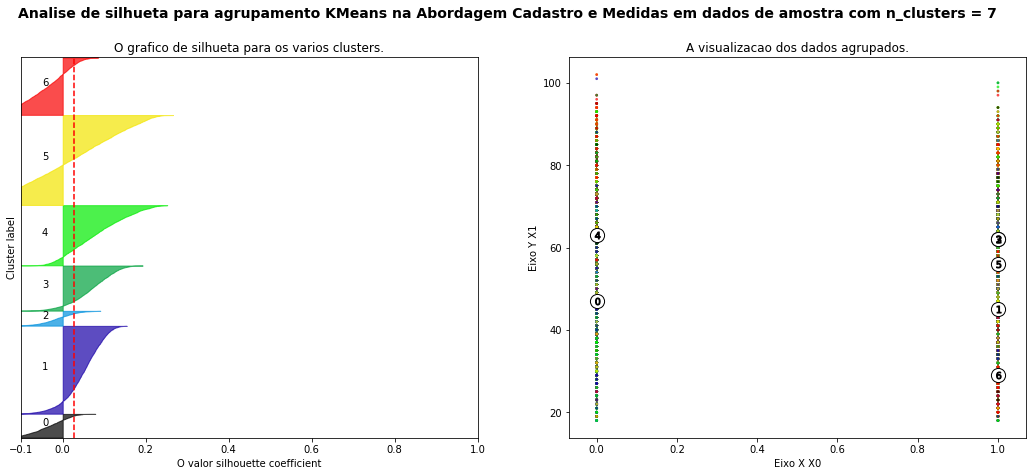

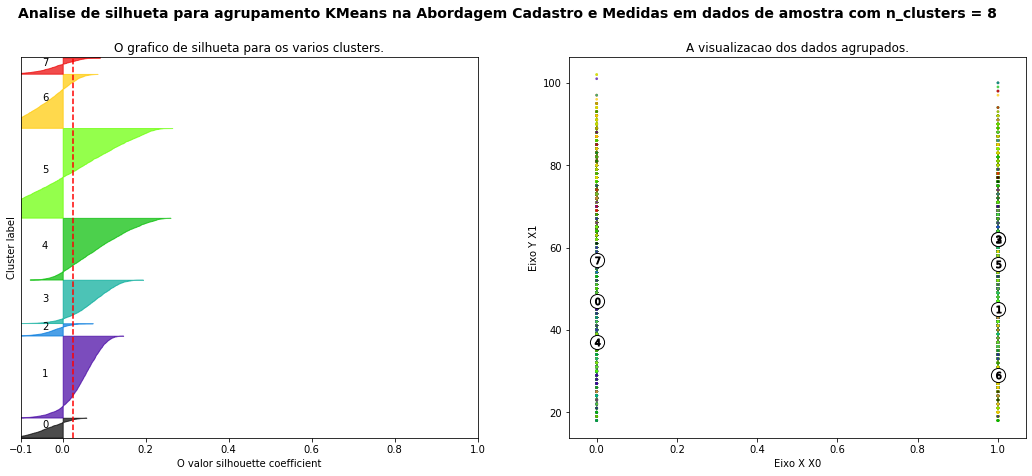

In [33]:
#Silhouette
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # O 1st subplot é o grafico silhouette
    # O coeficiente silhouette  um range de -1, 1 but in this example all
    # Os exemplos vão ficar em [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # O (n_clusters + 1) * 10 é para inserir um espaço em branco entre a silhueta
    # Para gerar destaque
    ax1.set_ylim([0, len(dados_cadastro_array) + (n_clusters + 1) * 10])
    # Inicialize o clusterer com o valor n_clusters e um valor aleatorio
    # seed 10.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer = KMedoids(n_clusters=n_clusters, random_state=42, metric='manhattan')
    %time cluster_labels = clusterer.fit_predict(dados_cadastro_array)
# O silhouette_score fornece o valor médio para todas as amostras.
    # Isso dá uma perspectiva sobre a densidade e separação das formas
    # clusters
    #  Cálculo de toda a matriz que entra no cálculo do Silhouette
    silhouette_avg = silhouette_score(dados_cadastro_array, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette medio e :", silhouette_avg)
    # Calcule as pontuações da silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(dados_cadastro_array, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregue as pontuações de silhueta para amostras pertencentes a
        # cluster i, e classifica-los
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Rotule os gráficos de silhueta com seus números de cluster no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcule o novo y_lower para o próximo gráfico
        y_lower = y_upper + 10  #10 para as 0 amostras
    ax1.set_title("O grafico de silhueta para os varios clusters.")
    ax1.set_xlabel("O valor silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    # A linha vertical para a pontuação média da silhueta de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Limpar os yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2º gráfico mostrando os clusters reais formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dados_cadastro_array[:, 0], dados_cadastro_array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling dos clusters
    centers = clusterer.cluster_centers_
    # Desenhe círculos brancos nos centros do cluster
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("A visualizacao dos dados agrupados.")
    ax2.set_xlabel("Eixo X X0")
    ax2.set_ylabel("Eixo Y X1")
    plt.suptitle(("Analise de silhueta para agrupamento KMeans na Abordagem Cadastro e Medidas em dados de amostra "
                  "com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    fig = plt.gcf()
    fig.savefig( DIR_KMEDOIDS / 'graficos' / f'metodosilhouette_cadastro_{n_clusters}.svg', format="svg")
    
plt.show()

#fig.savefig('diast_sist_kmeans.png', format='png')

### Não existe um valor de k clusters que não esteja se intersectando 

In [34]:
#dataset com grupos e com os dados de cadastro e medidas
# nume id, data exame, idade, peso, altura, medidas, 22 estaitsticos, 11 doenças em cada grupo 
dataset_s_d = dataset_apos_tratamento.loc[:,'numero_identificacao':'altura']
dataset_s_d['IMC'] = dataset_cadastro['IMC']
dataset_s_d['grupo'] = grupos_cadastro
dataset_s_d = pd.concat([dataset_s_d,dataset_apos_tratamento.loc[:,'sist 9:00':'Picos Diastolica']],axis=1)
dataset_s_d

# Salva dataset com dados completos após o K-Means com abordagem 1 (cadastro e medidas)
dataset_s_d.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'mapa_apos_kmedoids_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

In [35]:
dataset_s_d.head()

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,4,105.0,108.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,4,103.0,114.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,6,147.0,148.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,6,140.0,139.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,1,113.0,110.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11


## Abordagem 1: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#parametro simples do modelo
%time random_forest_cadastro = RandomForestClassifier(n_estimators=50)

Wall time: 0 ns


In [38]:
#base para modelo

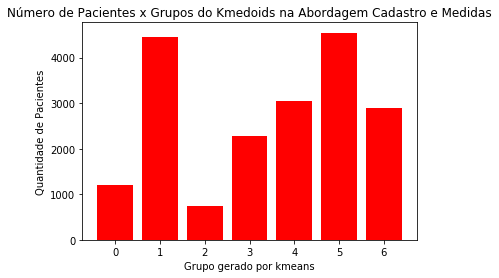

In [39]:
classes = []
qtds = []

contagem = Counter(grupos_cadastro)

for i in range(0,num_otimo_clusters_cadastro):
    classes.append(i)
    qtds.append(contagem[i])

plt.bar(classes,qtds,color="red")
plt.xticks(classes)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Grupo gerado por kmeans')
plt.title('Número de Pacientes x Grupos do Kmedoids na Abordagem Cadastro e Medidas')
fig = plt.gcf()
fig.savefig(DIR_KMEDOIDS / 'graficos' / 'grafico_Random_Abordagem1_pacientes_por_grupos.svg',format="svg")
plt.show()


In [40]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

#separar train(75%) - 14.485, test (10%) - 7.726  and validation (15%) - 11.588
#  O parâmetro random_state=42 garante o rastreio do numero de identificação
x_train, x_test, y_train, y_test = train_test_split(dados_cadastro_array, grupos_cadastro, test_size=1 - train_ratio,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(dados_cadastro_array, grupos_cadastro, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

In [41]:
#treino
random_forest_cadastro.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

#### Abordagem 1: VALIDAÇÃO

In [42]:
#calcular acuracia, recall e f1
y_prev_val = random_forest_cadastro.predict(x_val)

accuracy = accuracy_score(y_val, y_prev_val)
recall = recall_score(y_val, y_prev_val,average='macro')
f1 = f1_score(y_val, y_prev_val,average='macro')

In [43]:
print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


In [44]:
#Matriz de Confusão
mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

,0,1,2,3,4,5,6
0,728,0,0,0,0,0,0
1,0,2683,0,0,0,0,0
2,0,0,460,0,0,0,0
3,0,0,0,1378,0,0,0
4,0,0,0,0,1799,0,0
5,0,0,0,0,0,2700,0
6,0,0,0,0,0,0,1744


#### Abordagem 1: TESTE

In [45]:
#calcular acuracia, recall e f1
y_prev_test = random_forest_cadastro.predict(x_test)

accuracy = accuracy_score(y_test, y_prev_test)
recall = recall_score(y_test, y_prev_test,average='macro')
f1 = f1_score(y_test, y_prev_test,average='macro')

In [46]:
print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

Accuracy: 0.8714434873401201 - Recall: 0.7730014961523225 - F1 Score: 0.8044209905716592


In [47]:
#Matriz da Confusão
mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

,0,1,2,3,4,5,6
0,223,71,1,29,19,30,98
1,3,1647,2,45,45,4,11
2,7,85,125,16,11,9,36
3,4,124,1,687,1,58,27
4,1,76,0,0,1164,0,2
5,0,0,0,30,0,1796,19
6,7,29,2,24,7,51,1035


In [48]:
dataset_s_d.describe()
dados_cadastro_array.shape
dados_cadastro_sem_id

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0,5
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0,5
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0,7
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0,7
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,156.0,...,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0,6
19150,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,123.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,6
19151,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,114.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,5
19152,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,102.0,...,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,5


In [49]:
#salvar dataframe numero_paciente, grupo_real, grupo, previsto validação
x_train_, x_test_, y_train_, y_test_ = train_test_split(dataset_s_d, grupos_cadastro, test_size=1 - train_ratio, random_state=42)
x_val_, x_test_, y_val_, y_test_ = train_test_split(dataset_s_d, grupos_cadastro, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

#validacao
pacientes_validacao_diast_sisto = x_val_[['numero_identificacao']]
pacientes_validacao_diast_sisto['Grupo_Real'] = y_val_
pacientes_validacao_diast_sisto['Grupo_Previsto'] = y_prev_val

pacientes_validacao_diast_sisto.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'pacientes_validacao_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

#teste
pacientes_teste_diast_sisto = x_test_[['numero_identificacao']]
pacientes_teste_diast_sisto['Grupo_Real'] = y_test_
pacientes_teste_diast_sisto['Grupo_Previsto'] = y_prev_test

pacientes_teste_diast_sisto.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'pacientes_teste_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')


c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

#### Abordagem 1: Importância das Features Random Forest

In [50]:
len(ls_cadastro), len(random_forest_cadastro.feature_importances_)

(167, 167)

In [51]:
#calculo da importancia de cada variavel para idenficar os grupos com 3 casas decimais
importancia = pd.DataFrame({'features':ls_cadastro,'importance':np.round(random_forest_cadastro.feature_importances_,3)})
importancia = importancia.sort_values('importance',ascending=False)

#importances.to_excel('diastolica_sistolica/features_sisto_diasto.xlsx')

importancia.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'importancia_features_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

importancia

,features,importance
90,diast 10:15,0.015
96,diast 11:45,0.014
56,sist 22:15,0.013
125,diast 19:00,0.012
3,sist 9:00,0.012
...,...,...
155,diast 6:00,0.003
160,diast 7:15,0.003
2,IMC,0.002
1,idade,0.002


# Abordagem 7: por Categorias 

In [52]:
#dataset_por_classes[ls_classes]
#ls_classes

In [53]:
#convertendo os dados para entrega ao Random - Classifcação

#ls_classes = list(dataset_por_classes.loc[:,'genero':].columns)

ls_classes = list((dataset_por_classes.drop(list(dataset_por_classes.loc[:,'sist 9:00':'diast 8:45'].columns),axis=1)).drop('numero_identificacao',axis=1).columns)

array_classes = np.array(dataset_por_classes[ls_classes])
print (dataset_por_classes)
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
sum_of_squares = calculate_wcss(array_classes)
n_classes = optimal_number_of_clusters(sum_of_squares)
print (n_classes)

       numero_identificacao  genero  idade  IMC  sist 9:00  sist 9:15  \
0                         4       1      3    3      105.0      108.0   
1                         5       1      3    2      103.0      114.0   
2                         6       1      1    2      147.0      148.0   
3                         7       0      1    1      140.0      139.0   
4                         8       1      1    3      113.0      110.0   
...                     ...     ...    ...  ...        ...        ...   
19149                 21786       1      1    2      163.0      198.0   
19150                 21787       1      1    2      114.0      120.0   
19151                 21788       0      1    3      107.0      110.0   
19152                 21792       0      3    2       94.0      107.0   
19153                 21793       1      1    3      111.0      104.0   

       sist 9:30  sist 9:45  sist 10:00  sist 10:15  ...  Hipotensao  \
0          116.0      104.0       106.0        98.0

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

2


In [54]:
#   habilitando o k-means com "optimal_number_of_clusters" grupos (calculado na etapa anterior)

#kmeans_classes = KMeans(n_clusters=n_classes, random_state=42).fit(array_classes)
kmedoids_classes = KMedoids(n_clusters=n_classes, random_state=42, metric='manhattan').fit(array_classes)


#listar os grupos 

grupos_classes = kmedoids_classes.fit_predict(array_classes)


grupos_classes

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
#  Inclui a coluna Grupo no dataset que será gravado no final
dataset_por_classes['grupo'] = grupos_classes 
dataset_por_classes['grupo'] = dataset_por_classes['grupo'] + 1

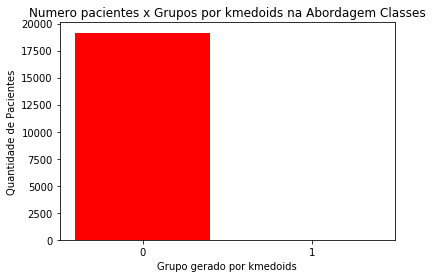

In [56]:
from sklearn.ensemble import RandomForestClassifier

#parametro simples do modelo
random_forest_classes = RandomForestClassifier(n_estimators=50)

#base para modelo
classes = []
qtds = []

contagem = Counter(grupos_classes)

for i in range(0,n_classes):
    classes.append(i)
    qtds.append(contagem[i])

plt.bar(classes,qtds,color="red")
plt.xticks(classes)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Grupo gerado por kmedoids')
plt.title('Numero pacientes x Grupos por kmedoids na Abordagem Classes')
fig = plt.gcf()
fig.savefig(DIR_KMEDOIDS / 'graficos' / 'grafico_Random_AbordagemClasses_doenca_por_grupos.svg',format="svg")
plt.show()

In [57]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# Feature Selection
x_train, x_test, y_train, y_test = train_test_split(array_classes, grupos_classes, test_size=1 - train_ratio,random_state=42)

# Feature Selection
x_val, x_test, y_val, y_test = train_test_split(array_classes, grupos_classes, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

# Aplicação do modelo Random Forest no conjunto de dados de treino
random_forest_classes.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [58]:
#### Abordagem 7: VALIDAÇÃO

#calcular acuracia, recall e f1
y_prev_val = random_forest_classes.predict(x_val)

accuracy = accuracy_score(y_val, y_prev_val)
recall = recall_score(y_val, y_prev_val,average='macro')
f1 = f1_score(y_val, y_prev_val,average='macro')

print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

#Matriz de Confusão
mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


,0,1
0,11492,0
1,0,0


In [59]:
#### Abordagem 7: TESTE

#calcular acuracia, recall e f1
y_prev_test = random_forest_classes.predict(x_test)

accuracy = accuracy_score(y_test, y_prev_test)
recall = recall_score(y_test, y_prev_test,average='macro')
f1 = f1_score(y_test, y_prev_test,average='macro')

print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

#Matriz de Confusão
mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


,0,1
0,7662,0
1,0,0


In [60]:
# Importância para Categorias

importancia = pd.DataFrame({'features':ls_classes,'importance':np.round(random_forest_classes.feature_importances_,3)})

importancia = importancia.sort_values('importance',ascending=False)

importancia.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'importancia_features_categoria.csv', 
             sep=';',index=False,encoding='UTF-8')

importancia

,features,importance
0,genero,0.0
1,idade,0.0
2,IMC,0.0
3,Hipotensao,0.0
4,Sistolica Isolada,0.0
5,Diastolica Isolada,0.0
6,Dipping,0.0
7,Non Dipping,0.0
8,Extreme Dipping,0.0
9,Reverse Dipping,0.0


# Função para gravar os outputs

In [61]:
def gera_arquivos_por_grupo(todos_dados_grupo, abordagem):
    grupos = list(set(todos_dados_grupo['grupo'].values))
    
    todos_dados_grupo.to_csv(DIR_KMEDOIDS / f"KMEDOIDS_approach_{abordagem}_todos_pacientes.csv", 
                        sep=";", encoding="latin1", index=False)
    
    for grupo in grupos:
        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
        df_grupo.to_csv(DIR_KMEDOIDS / f"KMEDOIDS_approach_{abordagem}_grupo_{grupo}.csv", 
                        sep=";", encoding="latin1", index=False)
    true_false_1_0 = {True:1, False:0}
    for doenca in list(todos_dados_grupo.loc[:,'Hipotensao':'Normotenso'].columns):
        todos_dados_grupo.loc[:,doenca] = todos_dados_grupo.loc[:,doenca].replace(true_false_1_0)
    
    todos_dados_grupo.to_csv(DIR_KMEDOIDS / f"KMEDOIDS_approach_{abordagem}_compara_todos_pacientes.csv", 
                        sep=";", encoding="latin1", index=False)

##  Grava arquivo da abordagem 1 - Cadastro e Medidas

In [62]:
dados_completos_cadastro = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    dados_cadastro_sem_id['grupo'],
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

genero_M_F = {"genero": {1: "M", 0: "F"}}
dados_completos_cadastro = dados_completos_cadastro.replace(genero_M_F)

In [63]:
gera_arquivos_por_grupo(dados_completos_cadastro,'cadastro')

In [64]:
dados_completos_cadastro[dados_completos_cadastro['grupo'] == 2]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
4,8,1990-03-07,M,28.0,120.0,172,40.6,2018-12-26 08:26:59,2,113.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996
6,10,1965-09-18,M,53.0,89.0,174,29.4,2018-12-26 09:59:12,2,122.0,...,76.0,9821.5,6122.5,3111.5,538.0,10.51,10.24,5,10,1.015233
7,11,1974-04-29,M,44.0,81.0,176,26.1,2018-12-26 10:01:51,2,100.0,...,74.0,9001.5,5952.5,2469.5,525.5,8.59,8.47,8,7,1.050556
31,38,1965-06-27,F,53.0,93.0,"1,62",35.4,2018-12-26 16:06:36,2,112.0,...,72.0,9233.0,5835.0,2769.0,566.0,13.27,10.21,9,11,1.032903
34,41,1981-03-30,F,37.0,70.0,"1,63",26.3,2018-12-26 16:49:07,2,110.0,...,79.0,8987.5,6161.5,2261.5,519.5,11.11,12.81,11,15,1.125860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19133,21764,1992-08-28,F,28.0,70.0,"1,60",27.3,2020-09-10 11:41:43,2,121.0,...,75.0,8776.5,6001.5,2242.0,499.0,11.44,11.77,18,14,1.136596
19137,21768,1964-09-26,F,55.0,71.0,157,28.8,2020-09-10 13:31:17,2,114.0,...,80.0,9316.5,6440.0,2402.0,426.0,13.05,11.73,11,20,1.211550
19145,21779,1947-04-19,F,73.0,71.0,159,28.1,2020-09-10 15:13:35,2,137.0,...,68.0,9369.5,5393.5,3321.0,604.0,13.71,10.41,14,19,1.085333
19147,21782,1979-05-23,F,41.0,56.0,"1,58",22.4,2020-09-10 15:31:01,2,121.0,...,83.0,9108.0,6613.5,2069.5,391.5,14.49,12.30,19,13,1.181546


##   Grava arquivo da abordagem 7: CATEGORIAS

In [65]:
#def gera_arquivos_por_grupo(todos_dados_grupo):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_classes_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#
#
##gera_arquivos_por_grupo(todos_dados_grupo)

In [66]:
dados_completos_classes = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    dataset_por_classes['grupo'],
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

genero_M_F = {"genero": {1: "M", 0: "F"}}
dados_completos_classes = dados_completos_classes.replace(genero_M_F)

In [67]:
#gera_arquivos_por_grupo(dados_completos_classes)

In [68]:
gera_arquivos_por_grupo(dados_completos_classes,'categorias')

In [69]:
#gera_arquivos_por_grupo(df_medidas_importantes,'medidas_importantes')

# Abordagem 2: MEDIDAS como entrada

In [70]:
#  Para calcular o número INICIAL de cluster para que 
# o K-Medoids calcule o número ótimo de Cluster que vai ser entregue ao método

def calculate_wcss_medidas(data):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    from sklearn_extra.cluster import KMedoids
    wcss = []
    for n in range(2, 21):
        kmedoids = KMedoids(n_clusters=2, random_state=0,metric='manhattan')
        #kmedoids = KMedoids(n_clusters=n, random_state=42, metric='euclidean')
        kmedoids.fit(X=data)
        wcss.append(kmedoids.inertia_)

    return wcss


def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [71]:
#leitura do dataset completo com dados das medidas

dataset_medidas = pd.read_csv(DIRETORIO_PRINCIPAL / "KMedoids/centroide/kmedoids_pacientes_abordagem_medidas.csv", 
             sep=';',encoding='UTF-8')

#dataset = dataset.drop ("Unnamed: 0", axis=1)
#for i in dataset.columns:
#    print(repr(i))
#
dataset_medidas

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,8,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19150,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19151,21788,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19152,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [72]:
dados_medidas_sem_id = dataset_medidas.loc[:,'sist 9:00':'diast 8:45']

In [73]:
dados_medidas_sem_id

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,116.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19150,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19151,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19152,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [74]:
#   Gera uma lista com cabeçalhos
ls_medidas = list(dados_medidas_sem_id.columns)

#dados_sist_diast = dados_sist_diast.drop(['peso','altura','data_exame'],axis=1)

dados_medidas_sem_id.head(5)

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,116.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0


## Abordagem 2: Número de Clusters gerado pelo k-Medoids

In [75]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos) com base no K-Medoids
#%time sum_of_squares_medidas = calculate_wcss_medidas(dados_medidas_sem_id)
#num_otimo_clusters_medidas = optimal_number_of_clusters(sum_of_squares_medidas)
#num_otimo_clusters_medidas
num_otimo_clusters_medidas = 5

In [76]:
#convertendo os dados para a clusterização
#  Dados socio-demográficos, os grupos e as 164 medidas de PAS e PAD
dados_medidas_array = np.array(dados_medidas_sem_id)

In [77]:
#habilitando o K-medoids com n grupos (foi calculado na etapa anterior)
kmedoids_medidas =  KMedoids(n_clusters=num_otimo_clusters_medidas, random_state=42, metric='manhattan').fit(dados_medidas_array)

In [78]:
#listar os grupos 
grupos_medidas = kmedoids_medidas.fit_predict(dados_medidas_array)

In [79]:
#incluir grupos nos dados de sist e diast
dados_medidas_sem_id['grupo'] = grupos_medidas
dados_medidas_sem_id['grupo'] = dados_medidas_sem_id['grupo'] + 1
dados_medidas_sem_id


,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,116.0,...,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0,5
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0,5
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0,4
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0,4
4,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0,3
19150,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,3
19151,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,104.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,5
19152,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,5


In [117]:
medidas_com_id = pd.concat([dataset['numero_identificacao'],dataset.loc[:,'sist 9:00':'diast 8:45']],axis=1)
medidas_com_id

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,8,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19150,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19151,21788,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19152,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [161]:
def cluster_centers(df,ls_cluster_centers,abordagem):
    saida = pd.DataFrame()
    lista = []
    for cluster_center in range(len(ls_cluster_centers)):
        for paciente in range(len(df)):
            if (list((df.loc[paciente]['sist 9:00':'diast 8:45']).values) == list(ls_cluster_centers[cluster_center])):
                lista.append(df.loc[paciente,:])
                break
    cabecalho = list(df.columns)
    for coluna in cabecalho:
        lista_coluna = []
        for cluster in lista:
            lista_coluna.append(cluster.loc[coluna])
        saida[coluna] = lista_coluna
    
    saida.to_csv(DIR_KMEDOIDS / 'centroide' / f"KMEDOIDS_approach_{abordagem}_pacientes_centroide.csv", 
                    sep=";", encoding="latin1", index=False)   
    return saida

In [162]:
saida = cluster_centers(dataset,kmedoids_medidas.cluster_centers_,'medidas')
saida

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,461,1956-08-09,1,62.0,85.0,176,27.4,2019-01-16 07:52:48,132.0,140.0,...,80.0,9622.0,6413.0,2651.5,519.5,6.95,5.20,0,0,1.055795
1,10198,1974-07-03,1,45.0,94.0,187,26.9,2019-08-29 08:30:03,115.0,115.0,...,74.0,9371.0,6122.0,2656.5,532.0,5.99,6.28,0,0,1.089255
2,685,1962-09-12,1,56.0,87.0,170,30.1,2019-01-22 10:31:48,133.0,134.0,...,89.0,10652.0,7161.5,2907.0,547.0,7.53,6.90,7,27,1.077679
3,5864,1989-09-23,1,29.0,100.0,"1,80",30.9,2019-05-20 09:40:59,135.0,134.0,...,75.0,10237.5,6032.5,3417.0,733.5,6.44,6.03,1,2,1.040118
4,13622,1956-10-15,0,63.0,53.0,158,21.2,2019-11-29 09:01:17,108.0,105.0,...,65.0,8615.0,5292.5,2770.0,508.5,7.07,4.84,14,10,1.086140


In [166]:
#!pip install pyclustering

In [168]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.silhouette import silhouette

from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.utils import read_sample


In [169]:
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)

In [190]:
centers = kmeans_plusplus_initializer(sample,5).initialize()

In [191]:
kmeans_instance = kmeans(sample,centers)

In [192]:
kmeans_instance.process()

In [193]:
clusters = kmeans_instance.get_clusters()

In [194]:
clusters

[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [0, 6],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [1, 2, 3, 4, 5, 7, 8, 9]]

In [195]:
score = silhouette(sample,clusters).process().get_score()

In [196]:
score

[0.9018718066685689,
 0.7514201230048845,
 0.8949623093805393,
 0.9426117003712393,
 0.8546525277079824,
 0.9351765079543713,
 0.9505820819303659,
 0.9573537830238283,
 0.8727720389530743,
 0.8845668105950519,
 0.9879384017023435,
 0.990074084405311,
 0.9498645199568508,
 0.9304693006299694,
 0.9493792044282893,
 0.9731640452359442,
 0.9733605237636511,
 0.9556796219287949,
 0.964653025013965,
 0.949351925619148,
 0.927529036063318,
 0.9424110342878623,
 0.9083353324117981,
 0.9203350792547556,
 0.9295870869125847,
 0.9253887522814847,
 0.9528841900407831,
 0.943521445649994,
 0.928235075655551,
 0.8618864876837283,
 0.9642238584359983,
 0.9524278568978962,
 0.9408233206014155,
 0.9430394586750417,
 0.9340568831502999,
 0.9414790249254867,
 0.9345098390897709,
 0.9135277732418327,
 0.9288014851418849,
 0.9382385784903601,
 0.9099778255742426,
 0.9110773428866407,
 0.9405640850396425,
 0.9643970132452745,
 0.852158861050249,
 0.9155723243846605,
 0.9101871171969017,
 0.9289073886177702,

## Abordagem 2: O método Elbow

### Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico

### https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

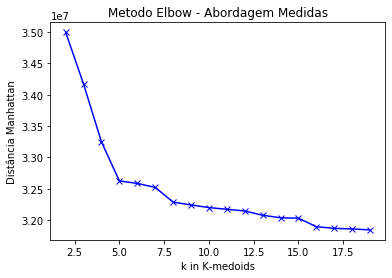

Wall time: 80 ms


In [86]:
#metodo de Elbow
Sum_of_squared_distances = []
K = range(2,20)

for k in K:
    km = KMedoids(n_clusters=k, metric='manhattan')
    km = km.fit(dados_medidas_array)
    
    # ??????????????????????????????????????????????????????????????????????????????????????
    #
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k in K-medoids')
plt.ylabel('Distância Manhattan')
plt.title('Metodo Elbow - Abordagem Medidas')
#plt.title('Metodo Elbow Para Otimizar k - Abordagem Medidas')
fig = plt.gcf() 
fig.savefig( DIRETORIO_PRINCIPAL / "KMedoids/centroide/graficos/metodoelbow__kmedoids_medidas.svg", format="svg")
%time plt.show()

In [87]:
#fig.savefig('D:\Projeto_PA\\Projeto_PA_validado\\KMeansRandom\\graficos\\grafico_metodoelbow_medidas.svg', format='svg')
#plt.savefig(DIR_NMF / f'NMF_classificado_{grupo}.svg',format="svg")
#fig.savefig('diastolica_sistolica/diast_sist_elbow.png', format='png')


## Abordagem 2: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



Wall time: 1min 5s
Para n_clusters = 2 O score_silhouette medio e : 0.21406013465018348
Wall time: 1min 5s
Para n_clusters = 3 O score_silhouette medio e : 0.09702554679438374
Wall time: 1min 1s
Para n_clusters = 4 O score_silhouette medio e : 0.07251728250975646


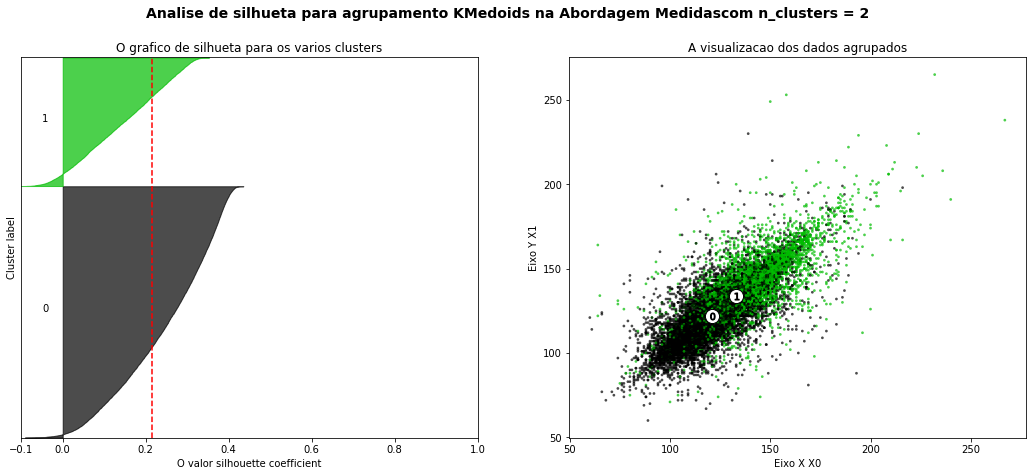

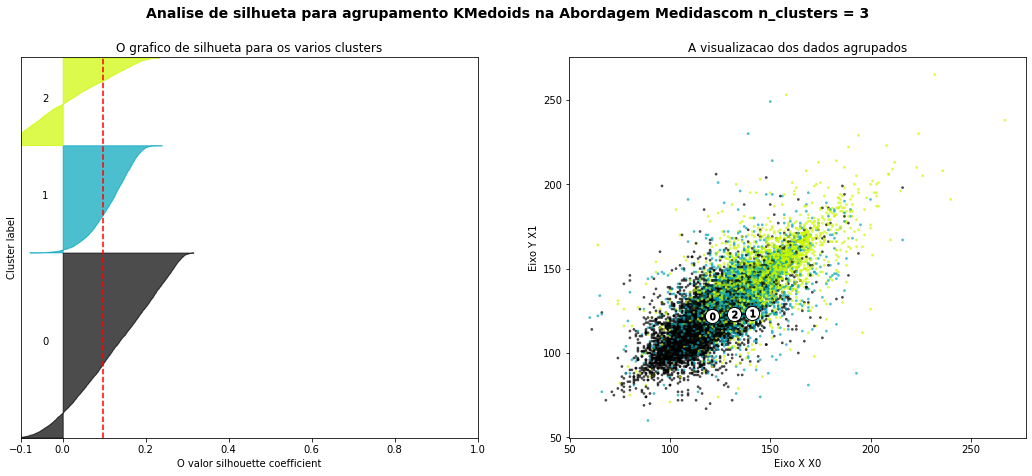

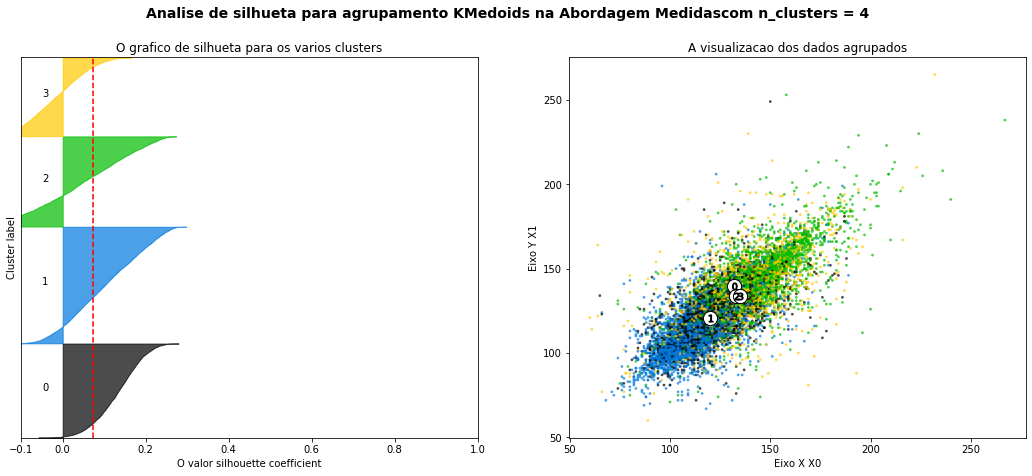

In [88]:
#Silhouette
range_n_clusters = range(2,num_otimo_clusters_medidas)
for n_clusters in range_n_clusters:    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # O 1st subplot é o grafico silhouette
    # O coeficiente silhouette  um range de -1, 1 but in this example all
    # Os exemplos vão ficar em [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # O (n_clusters + 1) * 10 é para inserir um espaço em branco entre a silhueta
    # Para gerar destaque
    ax1.set_ylim([0, len(dados_medidas_array) + (n_clusters + 1) * 10])
    # Inicialize o clusterer com o valor n_clusters e um valor aleatorio
    # seed 10.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=42, metric='manhattan')
    %time cluster_labels = clusterer.fit_predict(dados_medidas_array)
# O silhouette_score fornece o valor médio para todas as amostras.
# Isso dá uma perspectiva sobre a densidade e separação das formas
# clusters
#  Cálculo de toda a matriz que entra no cálculo do Silhouette
    silhouette_avg = silhouette_score(dados_medidas_array, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette medio e :", silhouette_avg)
    # Calcule as pontuações da silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(dados_medidas_array, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregue as pontuações de silhueta para amostras pertencentes a
        # cluster i, e classifica-los
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Rotule os gráficos de silhueta com seus números de cluster no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcule o novo y_lower para o próximo gráfico
        y_lower = y_upper + 10  #10 para as 0 amostras
    ax1.set_title("O grafico de silhueta para os varios clusters")
    ax1.set_xlabel("O valor silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    # A linha vertical para a pontuação média da silhueta de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Limpar os yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2º gráfico mostrando os clusters reais formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dados_medidas_array[:, 0], dados_medidas_array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling dos clusters
    centers = clusterer.cluster_centers_
    # Desenhe círculos brancos nos centros do cluster
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("A visualizacao dos dados agrupados")
    ax2.set_xlabel("Eixo X X0")
    ax2.set_ylabel("Eixo Y X1")
    plt.suptitle(("Analise de silhueta para agrupamento KMedoids na Abordagem Medidas"
                  "com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    fig = plt.gcf()
    fig.savefig( DIRETORIO_PRINCIPAL / f'KMedoids/centroide/graficos/metodosilhouette__kmedoids_medidas_{n_clusters}.svg', format="svg")
    
plt.show()

#  ??????????????????????????????????????????????????????????????????????????????????????????
#    não plota o gráfico
#fig.savefig('diast_sist_kmeans.png', format='png')
                

In [89]:
dataset_apos_tratamento

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,105.0,108.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34,0.966110
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,103.0,114.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23,0.969464
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,147.0,148.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,140.0,139.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,113.0,110.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,163.0,198.0,...,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60,1.134475
19150,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,114.0,120.0,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27,1.045759
19151,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,107.0,110.0,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26,1.029243
19152,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,94.0,107.0,...,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13,1.251898


In [90]:
#dataset com grupos e com os dados de cadastro e medidas
# nume id, data exame, idade, peso, altura, medidas, 22 estaitsticos, 11 doenças em cada grupo 
dataset_s_d = dataset_apos_tratamento.loc[:,'numero_identificacao':'data_exame']
dataset_s_d['grupo'] = grupos_medidas
dataset_s_d['grupo'] = dataset_s_d['grupo'] + 1
dataset_s_d = pd.concat([dataset_s_d,dataset_apos_tratamento.loc[:,'sist 9:00':]],axis=1)
dataset_s_d.head()

# Salva dataset com dados completos após o K-Means com abordagem 1 (cadastro e medidas)
dataset_s_d.to_csv(path_or_buf = DIR_KMEDOIDS / "centroide" / 'mapa_apos_kmedoids_medida.csv', 
             sep=';',index=False,encoding='UTF-8')

In [91]:
dataset_s_d.head()

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,5,105.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34,0.966110
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,5,103.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23,0.969464
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,4,147.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,4,140.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,2,113.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996


## Abordagem 2 MEDIDAS: Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
#parametro simples do modelo
%time random_forest_medida = RandomForestClassifier(n_estimators=50)

Wall time: 0 ns


In [94]:
#base para modelo

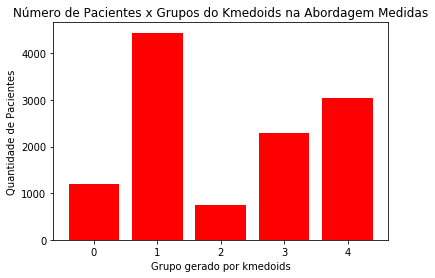

In [95]:
classes = []
qtds = []

contagem = Counter(grupos_cadastro)

for i in range(0,num_otimo_clusters_medidas):
    classes.append(i)
    qtds.append(contagem[i])

plt.bar(classes,qtds,color="red")
plt.xticks(classes)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Grupo gerado por kmedoids')
plt.title('Número de Pacientes x Grupos do Kmedoids na Abordagem Medidas')
fig = plt.gcf()
fig.savefig(DIR_KMEDOIDS / "centroide" / 'graficos' / 'grafico_Random_AbordagemMedida_pacientes_por_grupos.svg',format="svg")
plt.show()


In [96]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

#separar train(75%) - 14.485, test (10%) - 7.726  and validation (15%) - 11.588
#  O parâmetro random_state=42 garante o rastreio do numero de identificação
x_train, x_test, y_train, y_test = train_test_split(dados_medidas_array, grupos_medidas, test_size=1 - train_ratio,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(dados_medidas_array, grupos_medidas, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

In [97]:
#treino
random_forest_medida.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

#### Abordagem 2 MEDIDAS: VALIDAÇÃO

In [98]:
#calcular acuracia, recall e f1
y_prev_val = random_forest_medida.predict(x_val)

accuracy = accuracy_score(y_val, y_prev_val)
recall = recall_score(y_val, y_prev_val,average='macro')
f1 = f1_score(y_val, y_prev_val,average='macro')

In [99]:
print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


In [100]:
#Matriz de Confusão
mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

,0,1,2,3,4
0,1578,0,0,0,0
1,0,3044,0,0,0
2,0,0,2695,0,0
3,0,0,0,2368,0
4,0,0,0,0,1807


#### Abordagem 2 MEDIDAS: TESTE

In [101]:
#calcular acuracia, recall e f1
y_prev_test = random_forest_medida.predict(x_test)

accuracy = accuracy_score(y_test, y_prev_test)
recall = recall_score(y_test, y_prev_test,average='macro')
f1 = f1_score(y_test, y_prev_test,average='macro')

In [102]:
print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

Accuracy: 0.9122944400939702 - Recall: 0.899440358329888 - F1 Score: 0.905750558401577


In [103]:
#Matriz da Confusão
mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

,0,1,2,3,4
0,809,136,52,69,0
1,49,1837,3,38,29
2,26,0,1791,35,0
3,28,55,48,1405,3
4,0,92,0,9,1148


In [104]:
dataset_s_d.describe()
dados_medidas_array.shape
dados_medidas_sem_id

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,116.0,...,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0,5
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0,5
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0,4
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0,4
4,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0,3
19150,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,3
19151,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,104.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,5
19152,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,5


In [105]:
#salvar dataframe numero_paciente, grupo_real, grupo, previsto validação
x_train_, x_test_, y_train_, y_test_ = train_test_split(dataset_s_d, grupos_medidas, test_size=1 - train_ratio, random_state=42)
x_val_, x_test_, y_val_, y_test_ = train_test_split(dataset_s_d, grupos_medidas, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

#validacao
pacientes_validacao_diast_sisto = x_val_[['numero_identificacao']]
pacientes_validacao_diast_sisto['Grupo_Real'] = y_val_
pacientes_validacao_diast_sisto['Grupo_Previsto'] = y_prev_val

pacientes_validacao_diast_sisto.to_csv(path_or_buf = DIR_KMEDOIDS /  "centroide" / 'pacientes_validacao_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

#teste
pacientes_teste_diast_sisto = x_test_[['numero_identificacao']]
pacientes_teste_diast_sisto['Grupo_Real'] = y_test_
pacientes_teste_diast_sisto['Grupo_Previsto'] = y_prev_test

pacientes_teste_diast_sisto.to_csv(path_or_buf = DIR_KMEDOIDS /  "centroide" / 'pacientes_teste_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')


c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## Abordagem 2 MEDIDAS: Importância das Features Random Forest

In [106]:
len(ls_medidas), len(random_forest_medida.feature_importances_)

(164, 164)

In [107]:
#calculo da importancia de cada variavel para idenficar os grupos com 3 casas decimais
importancia = pd.DataFrame({'features':ls_medidas,'importance':np.round(random_forest_medida.feature_importances_,3)})
importancia = importancia.sort_values('importance',ascending=False)

#importances.to_excel('diastolica_sistolica/features_sisto_diasto.xlsx')

importancia.to_csv(path_or_buf = DIR_KMEDOIDS /  "centroide" / 'importancia_features_medida.csv', 
             sep=';',index=False,encoding='UTF-8')

importancia

,features,importance
87,diast 10:15,0.023
3,sist 9:45,0.019
93,diast 11:45,0.019
54,sist 22:30,0.013
53,sist 22:15,0.012
...,...,...
151,diast 5:30,0.003
152,diast 6:00,0.003
156,diast 7:00,0.003
159,diast 7:45,0.003


In [108]:
import sklearn.metrics as metric

In [109]:
metric.pairwise_distances_argmin_min(kmedoids_medidas.cluster_centers_,dados_medidas_array)


(array([  414,  9108,   617,  5257, 12075], dtype=int64),
 array([0., 0., 0., 0., 0.]))

In [110]:
kmedoids_medidas.cluster_centers_

array([[132., 140., 137., 131., 125., 124., 122., 128., 126., 123., 125.,
        133., 121., 119., 118., 117., 115., 117., 119., 116., 119., 128.,
        129., 122., 117., 119., 114., 114., 125., 121., 116., 117., 116.,
        112., 120., 124., 118., 120., 123., 130., 124., 115., 115., 125.,
        121., 117., 121., 113., 116., 122., 118., 116., 111., 112., 121.,
        113., 118., 114., 106., 118., 113., 114., 118., 102., 115., 112.,
        103., 114., 130., 119., 109., 111., 113., 113., 114., 115., 116.,
        116., 117., 118., 119., 118.,  90.,  90.,  86.,  89.,  83.,  84.,
         87.,  77.,  82.,  86.,  83.,  77.,  79.,  76.,  77.,  76.,  81.,
         81.,  84.,  83.,  86.,  84.,  79.,  80.,  79.,  81.,  75.,  82.,
         82.,  74.,  79.,  75.,  67.,  80.,  77.,  81.,  77.,  83.,  81.,
         80.,  83.,  87.,  80.,  85.,  84.,  76.,  83.,  86.,  82.,  84.,
         84.,  85.,  77.,  75.,  73.,  75.,  78.,  74.,  72.,  78.,  67.,
         76.,  74.,  70.,  77.,  77., 

In [111]:
lista = kmedoids_medidas.cluster_centers_
dici = {'c1':lista[0],'c2':lista[1]}

In [112]:
pontos_centroide_kmedoids = pd.DataFrame(dici)
pontos_centroide_kmedoids

,c1,c2
0,132.0,115.0
1,140.0,115.0
2,137.0,115.0
3,131.0,115.0
4,125.0,115.0
...,...,...
159,78.0,81.0
160,79.0,84.0
161,79.0,83.0
162,80.0,83.0
